In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from classes import Portfolio
import yfinance as yf
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from asset_database import DICT_ASSET_INFO
from tools import get_position,get_value,plot_position_graph,plot_position_table,plot_earnings_in_last_months,plot_dividends_in_last_months,generate_list_of_dates
from historico_tesouro.tresury_history import DICT_TRESURY_HISTORY
from data_base import GLOBAL_DATA_BASE

current_path = Path.cwd()
GLOBAL_DATA_BASE = GLOBAL_DATA_BASE

In [2]:
portfolio_luiz = Portfolio(GLOBAL_DATA_BASE[GLOBAL_DATA_BASE["owner"]=="Luiz"].drop("owner",axis=1),"Luiz")
portfolio_luciane = Portfolio(GLOBAL_DATA_BASE[GLOBAL_DATA_BASE["owner"]=="Luciane"].drop("owner",axis=1),"Luciane")

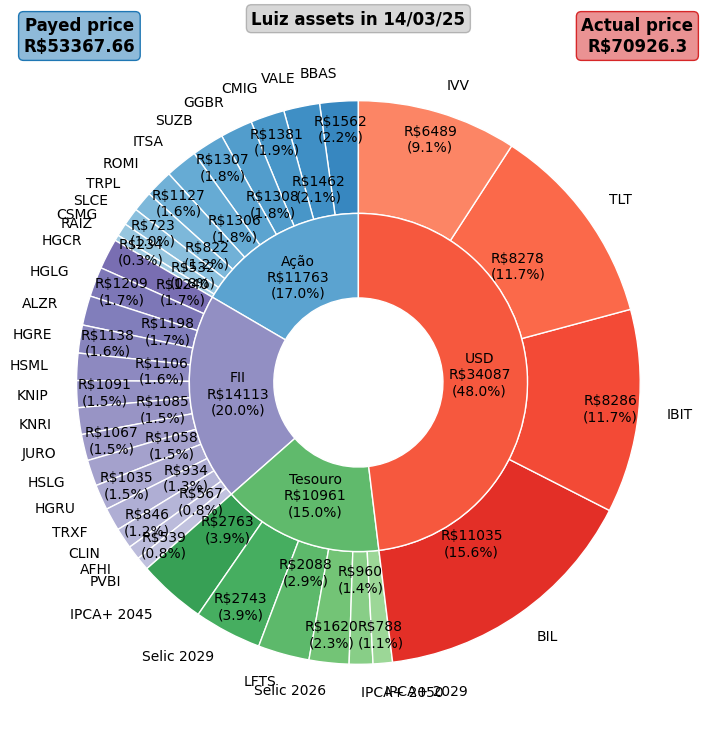

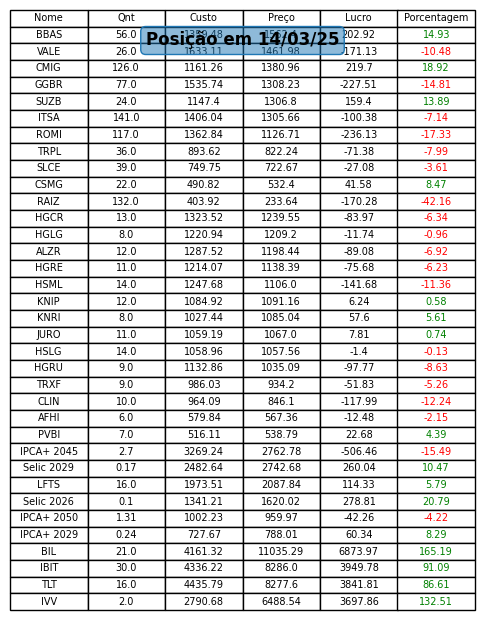

In [3]:
plot_position_graph(portfolio_luiz)
plot_position_table(portfolio_luiz)

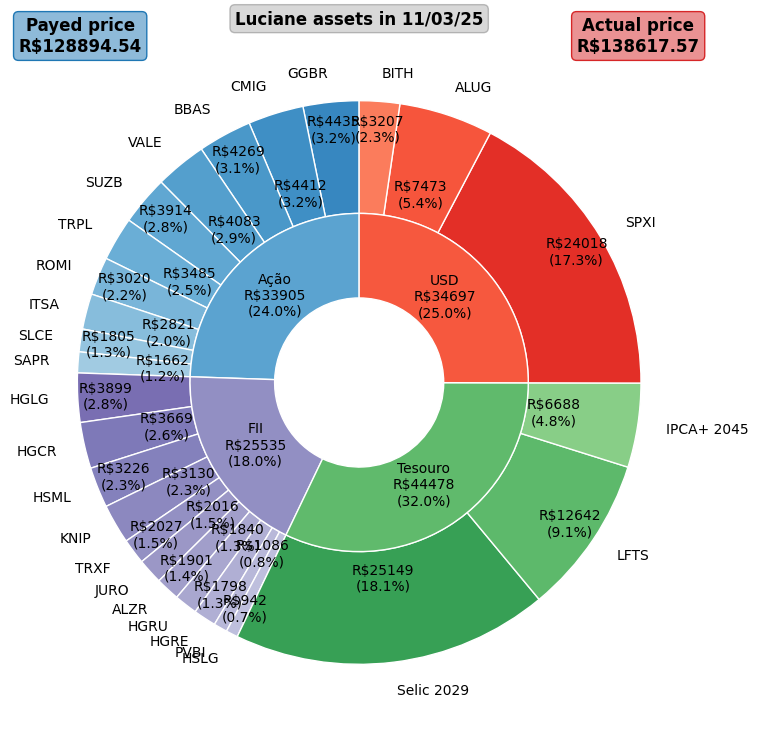

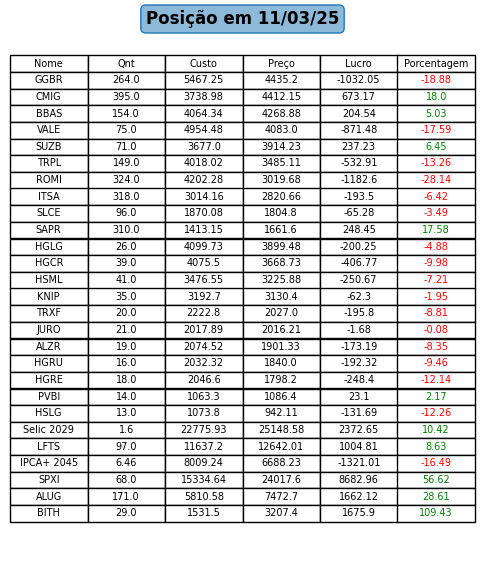

In [3]:
plot_position_graph(portfolio_luciane)
plot_position_table(portfolio_luciane)




In [ ]:
###### ploting ploting earnings and dividends in last months #####
plot_earnings_in_last_months(portfolio_luciane,delta_months=3)
plot_dividends_in_last_months(portfolio_luciane,delta_months=3)
plot_earnings_in_last_months(portfolio_luiz,delta_months=3)
plot_dividends_in_last_months(portfolio_luiz,delta_months=3)